<a href="https://colab.research.google.com/github/Adityakumarjha1997/Reunion_assignment/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3. **Preprocessing data before modelling**

In [ ]:
!pip install opendatasets --quiet

In [ ]:
import pandas as pd
import opendatasets as od
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import opendatasets as od
import warnings
import seaborn as sns


Required librarie imported

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

Libraries related to sklearn and tenserflow

In [ ]:
od.download('https://drive.google.com/file/d/1r4cUL4p9VB68T7KSKb4TCowF1mZSxx-X/view?usp=sharing')

174705it [00:00, 53947278.24it/s]

Downloaded to  ./ml_project.csv


In [ ]:
df = pd.read_csv('/content/ml_project.csv', index_col = [0])

In [ ]:
df.shape

(988, 21)

[Text(0.5, 1.0, 'Correlation analysis')]

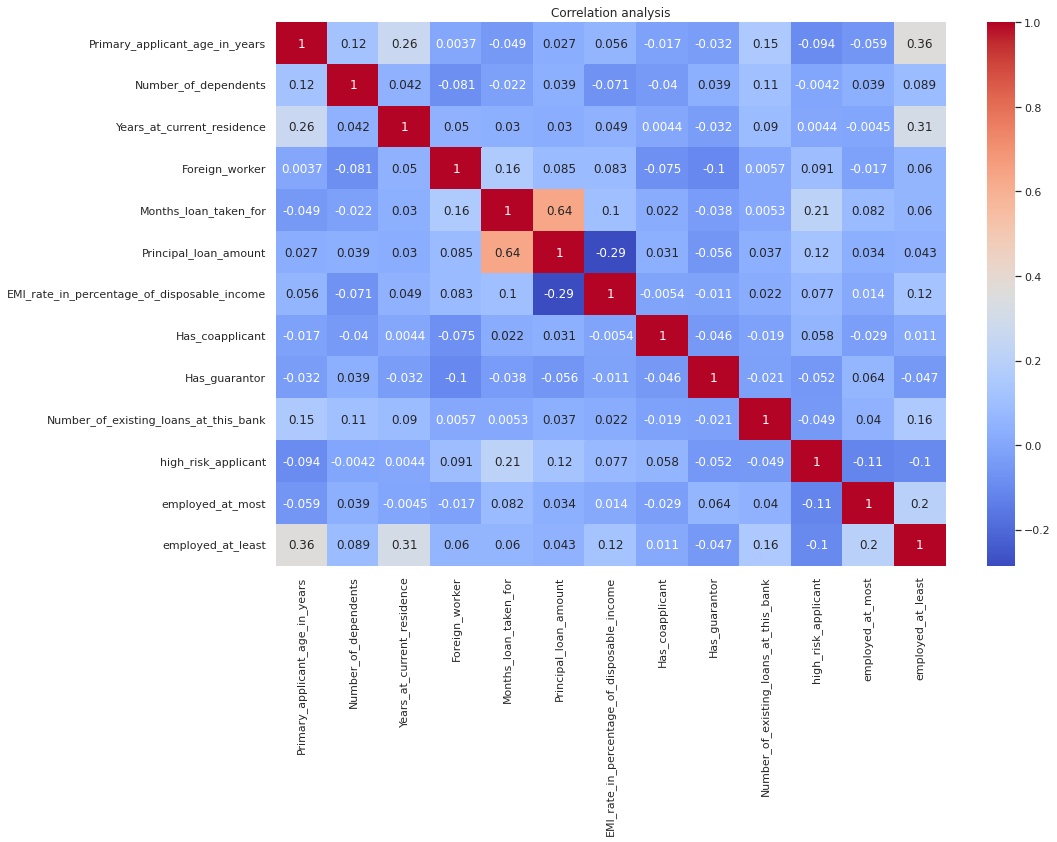

In [ ]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm').set(title = 'Correlation analysis')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Primary_applicant_age_in_years               988 non-null    int64  
 1   Gender                                       988 non-null    object 
 2   Marital_status                               988 non-null    object 
 3   Number_of_dependents                         988 non-null    int64  
 4   Housing                                      988 non-null    object 
 5   Years_at_current_residence                   988 non-null    int64  
 6   Employment_status                            988 non-null    object 
 7   Foreign_worker                               988 non-null    int64  
 8   Savings_account_balance                      988 non-null    object 
 9   Months_loan_taken_for                        988 non-null    float64
 10  Pu

Feature engeneering

### 3.1 Catagorical List

In [ ]:
cat_list  = df.select_dtypes(['object']).columns
cat_list

Index(['Gender', 'Marital_status', 'Housing', 'Employment_status',
       'Savings_account_balance', 'Purpose', 'Property', 'Loan_history'],
      dtype='object')

### 3.2 Ordinal Encoder

In [ ]:
def cat_mapper(data, var):
  cat_mapper = {k:i for i,k in enumerate(data[var].unique(),0)}
  data[var] = data[var].map(cat_mapper)

In [ ]:
for col in cat_list:
  cat_mapper(df,col)


### 3.3 Giving inputs and targets

In [ ]:
x = df.drop('high_risk_applicant', axis = 1)
y = df['high_risk_applicant']

## 4. **Training and Fitting the model**

### 4.1 Splitting the data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
scalar  = MinMaxScaler()

### 4.2 Scaling and transforming the categorical data

In [ ]:
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

### 4.3 Importing Required libraies

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import logging
from sklearn.metrics import classification_report, confusion_matrix

### 4.4 Creating different models using above libraries

In [ ]:
#creating model
model = Sequential()

#adding layer
model.add(Dense(30, activation= 'relu'))
model.add(Dropout(0.2))

model.add(Dense(15, activation= 'relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation= 'relu'))
model.add(Dropout(0.2))

model.add(Dense(5, activation= 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [ ]:
#parameter for early stopping
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose=1, patience= 5)

In [ ]:
model.fit(x = x_train, y = y_train, epochs = 25, validation_data=(x_test,y_test), callbacks=(early_stop))

Epoch 1/25
24/24 [==============================] - 2s 10ms/step - loss: 0.6634 - val_loss: 0.6409
Epoch 2/25
24/24 [==============================] - 0s 5ms/step - loss: 0.6461 - val_loss: 0.6217
Epoch 3/25
24/24 [==============================] - 0s 5ms/step - loss: 0.6278 - val_loss: 0.6121
Epoch 4/25
24/24 [==============================] - 0s 5ms/step - loss: 0.6289 - val_loss: 0.6066
Epoch 5/25
24/24 [==============================] - 0s 5ms/step - loss: 0.6307 - val_loss: 0.6082
Epoch 6/25
24/24 [==============================] - 0s 4ms/step - loss: 0.6254 - val_loss: 0.6047
Epoch 7/25
24/24 [==============================] - 0s 5ms/step - loss: 0.6188 - val_loss: 0.6001
Epoch 8/25
24/24 [==============================] - 0s 5ms/step - loss: 0.6137 - val_loss: 0.5962
Epoch 9/25
24/24 [==============================] - 0s 4ms/step - loss: 0.6169 - val_loss: 0.5925
Epoch 10/25
24/24 [==============================] - 0s 6ms/step - loss: 0.6115 - val_loss: 0.5969
Epoch 11/25
24/24 

In [ ]:
temp = []
conv_pred = model.predict(x_test)

for i in conv_pred:
  if i > 0.5:
    temp.append(1)
  else:
    temp.append(0)
    

              precision    recall  f1-score   support

           0       0.72      1.00      0.84       179
           1       0.00      0.00      0.00        68

    accuracy                           0.72       247
   macro avg       0.36      0.50      0.42       247
weighted avg       0.53      0.72      0.61       247



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


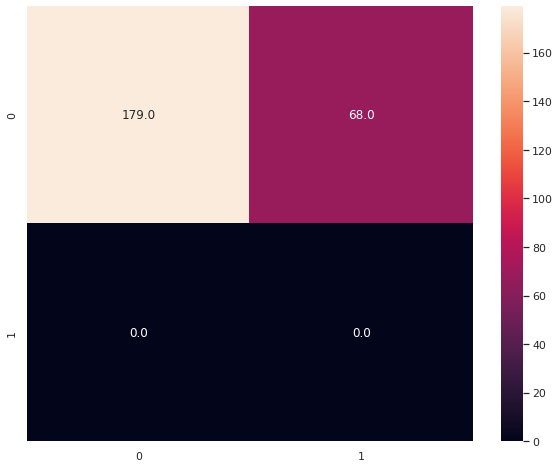

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(confusion_matrix(temp, y_test), annot= True, fmt = ".1f")
print(classification_report(y_test,temp))

We get a accureacy of 73% percernt using conventional model 


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

Importing machine learning models from sklearn

In [ ]:
Linear_algo =LinearRegression()

In [ ]:
tree_classifier_algo = DecisionTreeClassifier()

In [ ]:
Random_forest = RandomForestClassifier()

In [ ]:
xgboost = XGBClassifier()

In [ ]:
def model_clf(x):
  cl = x
  cl.fit(x_train, y_train)
  pred = cl.predict(x_test)
  plt.figure(figsize = (10,8))
  sns.heatmap(confusion_matrix(pred, y_test), annot= True, fmt = ".1f")
  print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       179
           1       0.46      0.46      0.46        68

    accuracy                           0.70       247
   macro avg       0.62      0.62      0.62       247
weighted avg       0.70      0.70      0.70       247



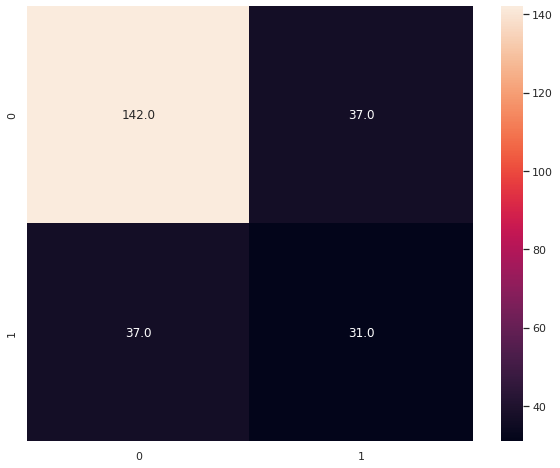

In [ ]:
model_clf(DecisionTreeClassifier())

We get a accureacy of 69% percernt using Desiscion tree model 


In [ ]:
Linear_algo.fit(x_train,y_train)
predd = Linear_algo.predict(x_test)
dump = []

for i in predd:
  if i > 0.5:
    dump.append(1)
  else:
    dump.append(0)
    

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       179
           1       0.69      0.32      0.44        68

    accuracy                           0.77       247
   macro avg       0.74      0.63      0.65       247
weighted avg       0.76      0.77      0.74       247



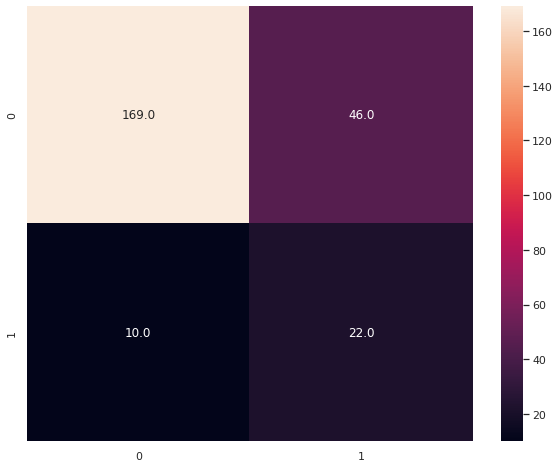

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(confusion_matrix(dump, y_test), annot= True, fmt = ".1f")
print(classification_report(y_test,dump))

We get a accureacy of 77% percernt using Linear regression model 


              precision    recall  f1-score   support

           0       0.77      0.92      0.84       179
           1       0.56      0.26      0.36        68

    accuracy                           0.74       247
   macro avg       0.66      0.59      0.60       247
weighted avg       0.71      0.74      0.71       247



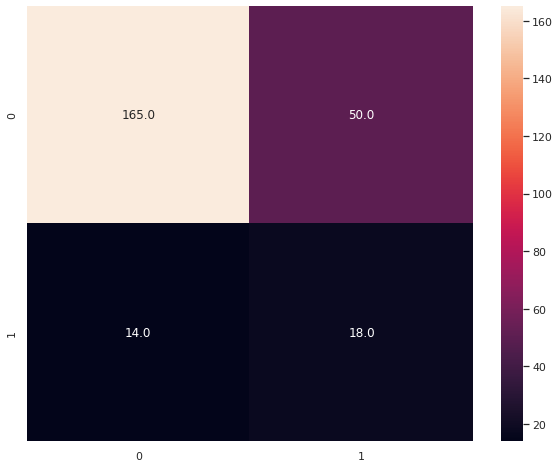

In [ ]:
model_clf(RandomForestClassifier())

We get a accureacy of 76% percernt using random forest classifier


              precision    recall  f1-score   support

           0       0.79      0.91      0.84       179
           1       0.59      0.35      0.44        68

    accuracy                           0.75       247
   macro avg       0.69      0.63      0.64       247
weighted avg       0.73      0.75      0.73       247



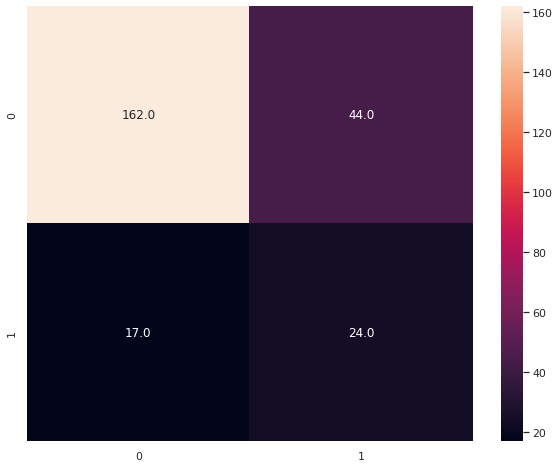

In [ ]:
model_clf(XGBClassifier())

We get a accureacy of 75% percernt using xgbclassifier model 


As by Watching over all the models i suppose linear regression model is working witht the highest accuracy let's try few hyper parameters to tune the other models and see if any of the model can work better then the linear model

In [ ]:
from sklearn.metrics import mean_squared_error

## 5. **Creating Helper funtions**

### 5.1 Funtion to test different parameters

In [ ]:
def test_params(model_T, **params):
    model = model_T(**params).fit(x_train, y_train)
    train_rmse = mean_squared_error(model.predict(x_train), y_train, squared=False)
    val_rmse = mean_squared_error(model.predict(x_test), y_test, squared=False)
    return train_rmse, val_rmse

### 5.3 Funtion to test and plot range of parameters

In [ ]:
def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

## 6. **Hyper parameter tuning**

In [ ]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
}

Let us see which range is working best with the following parameters

### 6.1 Tuning n_estimators

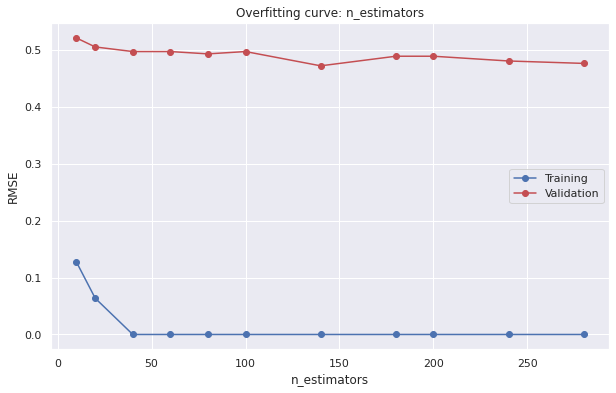

In [ ]:
test_param_and_plot(RandomForestClassifier, 'n_estimators', [10,20,40,60,80,100,140,180,200,240,280], **best_params)

Range 150 is working on validation curve let us consider this

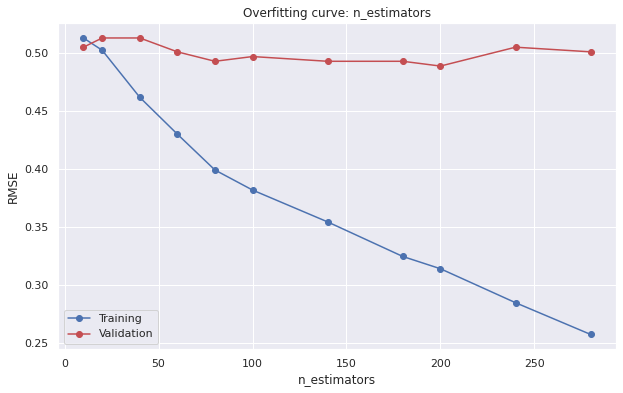

In [ ]:
test_param_and_plot(XGBClassifier, 'n_estimators', [10,20,40,60,80,100,140,180,200,240,280], **best_params)

Range 200 is working on validation curve let us consider this

### 6.2 Tuning max_depth

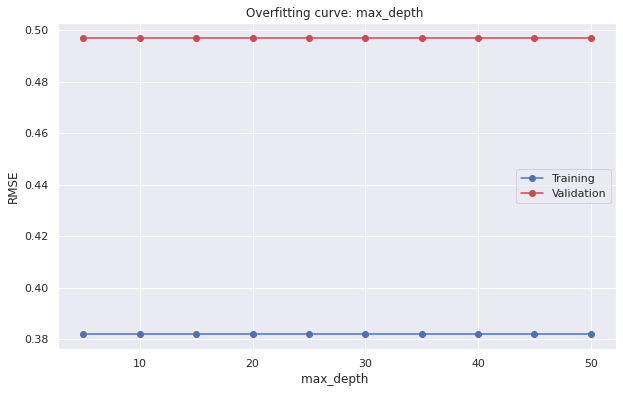

In [ ]:
test_param_and_plot(XGBClassifier, 'max_depth ', [5,10,15,20,25,30,35,40,45,50], **best_params)

There is no effect of max_depth in xgbclassifier so let us not conosider this

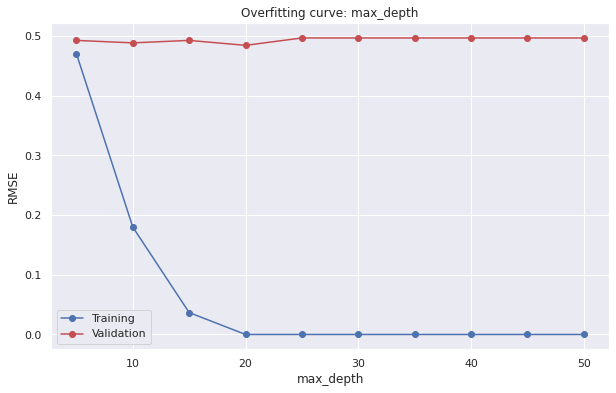

In [ ]:
test_param_and_plot(RandomForestClassifier, 'max_depth', [5,10,15,20,25,30,35,40,45,50], **best_params)

Range 20 is working on validation curve let us consider this

### 6.2 Tuning max_features

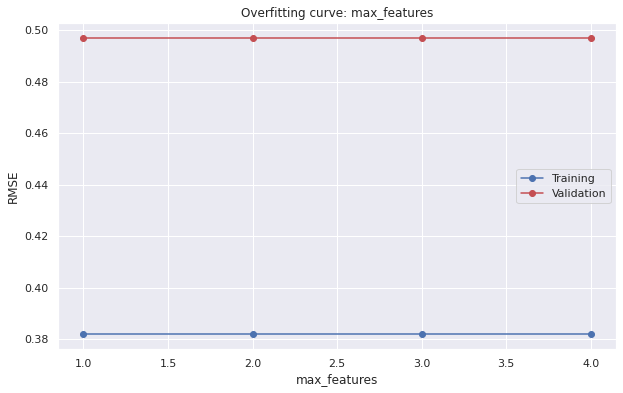

In [ ]:
test_param_and_plot(XGBClassifier, 'max_features', [1,2,3,4], **best_params)

There is no effect of max feature on xgb classifer

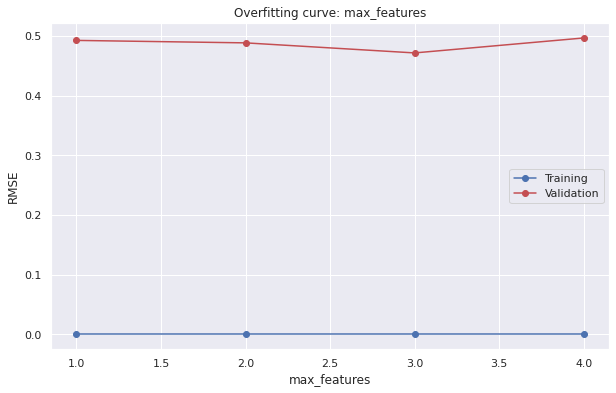

In [ ]:
test_param_and_plot(RandomForestClassifier, 'max_features', [1,2,3,4], **best_params)

Looks like max feature of 3 is working on validation set

Let us now replot all of the curve using privious models using the new parameters

In [ ]:
Random_forest = RandomForestClassifier(random_state= 42, n_jobs= -1, n_estimators=150, max_depth=20, max_features= 3)

In [ ]:
xgboost = XGBClassifier(random_state= 42, n_jobs= -1, n_estimators=200)

              precision    recall  f1-score   support

           0       0.79      0.94      0.85       179
           1       0.67      0.32      0.44        68

    accuracy                           0.77       247
   macro avg       0.73      0.63      0.65       247
weighted avg       0.75      0.77      0.74       247



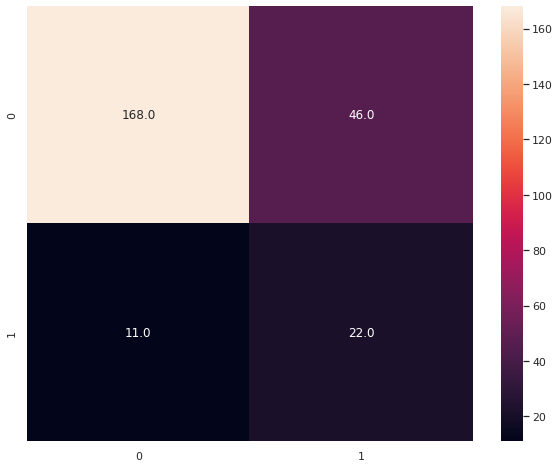

In [ ]:
model_clf(Random_forest)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       179
           1       0.59      0.43      0.50        68

    accuracy                           0.76       247
   macro avg       0.70      0.66      0.67       247
weighted avg       0.74      0.76      0.75       247



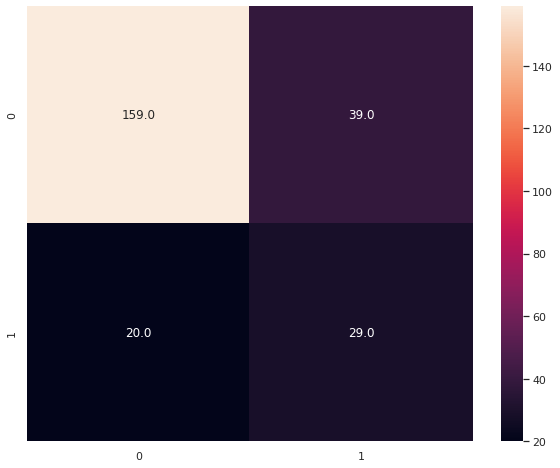

In [ ]:
model_clf(xgboost)

Let us consider Random forest model as our final model 

## 7. **Fitting the final model**

### 7.1 Fitting the model with final parameters

In [ ]:
Final_model = Random_forest.fit(x_train,y_train)

In [ ]:
importance_df = pd.DataFrame({
    'feature': x.columns,
    'importance': Final_model.feature_importances_
}).sort_values('importance', ascending=False)

### 7.2 Different weights on the final model

In [ ]:
importance_df

,feature,importance
11,Principal_loan_amount,0.146231
0,Primary_applicant_age_in_years,0.126059
9,Months_loan_taken_for,0.104860
10,Purpose,0.074527
17,Loan_history,0.074339
12,EMI_rate_in_percentage_of_disposable_income,0.052617
5,Years_at_current_residence,0.050527
19,employed_at_least,0.048013
18,employed_at_most,0.046325
13,Property,0.041056


Let us visualize how many mportant features are avilable

### 7.3 Ploting important features using sea born 

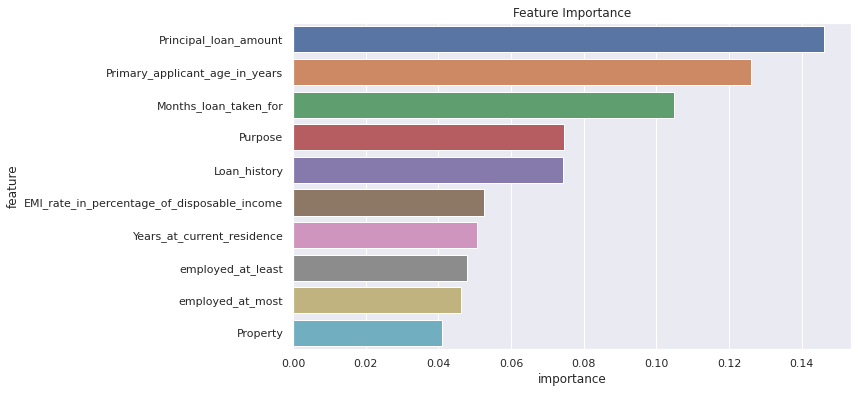

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## 8. **Saving the model using joblib**

### 8.1 importing required librarie

In [ ]:
import joblib

### 8.2 saving the model using joblib

In [ ]:
joblib.dump(Final_model, 'Model.joblib')

['Model.joblib']

### 8.3 Load the model using joblib

In [ ]:
model = joblib.load('Model.joblib')

## 9. **Testing the Model**

### 9.1 Predicting on x_test 

In [ ]:
preds = model.predict(x_test)

In [ ]:
for i in preds[:5]:
  if i == 0:
    print("The Applicant Can be Provided Loan")
  else:
    print("The Applicant May Default in Future")

The Applicant Can be Provided Loan
The Applicant Can be Provided Loan
The Applicant May Default in Future
The Applicant Can be Provided Loan
The Applicant Can be Provided Loan


## **Summary**

Considering this work, the key messages and conclusion of this work could be summarised as follows:
    
1. The project results show that the Random forest performs better then rest of the models on the training and validation datasets.

2. The data was skewd. we have normalize the data by removing the outliers present and used log on the target set to normalize it.

3. The model improved by implementing hyperparameter tunning as the score improves eventually once it is applied

4. Creating new features so that the model performence can be improved

5. Encoding and transforming data with the help of ordinal encoder so that we convert the categorical data into numerical and feed it to the input inturn it can be fitted to the desired model

6. we split the data and assign train inputs train targets and validation inputs and validation targets

6. Once we fit and tune the model with different parameters we finalize the model and fit it to the tuned parameters and then we predict the output to the test data we had split in the process

## **Future Work**

1. Using amoeba data set

2. Using deep learning to calssify the diseased amoeba and non diseased one using tenser flow and keras

3. Utilise the free kaggle cloud GPU to model the data using artificial neural networks such as CNN using tenser flow accelerator.

## **References**

Decision Trees and Random Forests - Machine Learning with Python (5.3) Zero to Data Science Bootcamp by Jovian - Aakash N S https://jovian.ai/aakashns/sklearn-decision-trees-random-forests. 

• How to Approach Machine Learning Projects, Zero to Data Science Bootcamp by Jovian - Aakash N https://jovian.ai/aakashns/how-to-approach-ml-problems.

• Logistic Regression with Scikit Learn - Machine Learning with Python Zero to Data Science Bootcamp by Jovian - Aakash N S https://jovian.ai/aakashns/python-sklearn-logistic-regression.

• Competition [Notebook](https://jovian.ai/ramysaleem/starter-notebook).
